In [ ]:
rm(list=ls())
library(readr)
df <- read_table2("http://azzalini.stat.unipd.it/Book-DM/yesterday.dat")[-31,]

Warning message:
“`read_table2()` was deprecated in readr 2.0.0.
ℹ Please use `read_table()` instead.”

── Column specification ────────────────────────────────────────────────────────
cols(
  x = col_double(),
  y.yesterday = col_double(),
  y.tomorrow = col_double()
)



In [ ]:
train <- data.frame(x = df$x, y = df$y.yesterday)
n <- nrow(train)
# K-fold CV
d <- 3
K <- 5
set.seed(123)
# create folds
folds <- sample( rep(1:K, length = n) )
# initialize vector
KCV <- vector()
# loop
for (k in 1:K){
fit   <- lm(y ~ poly(x, degree = d), train, subset = which(folds != k))
x.out <- train$x[which(folds == k)]
yhat  <- predict(fit, newdata = list(x = x.out))
y.out <- train$y[which(folds == k)]
KCV[k]<- mean( ( y.out - yhat )^2 )
}
# KCV estimate
mean(KCV)

[1] 0.0003160667

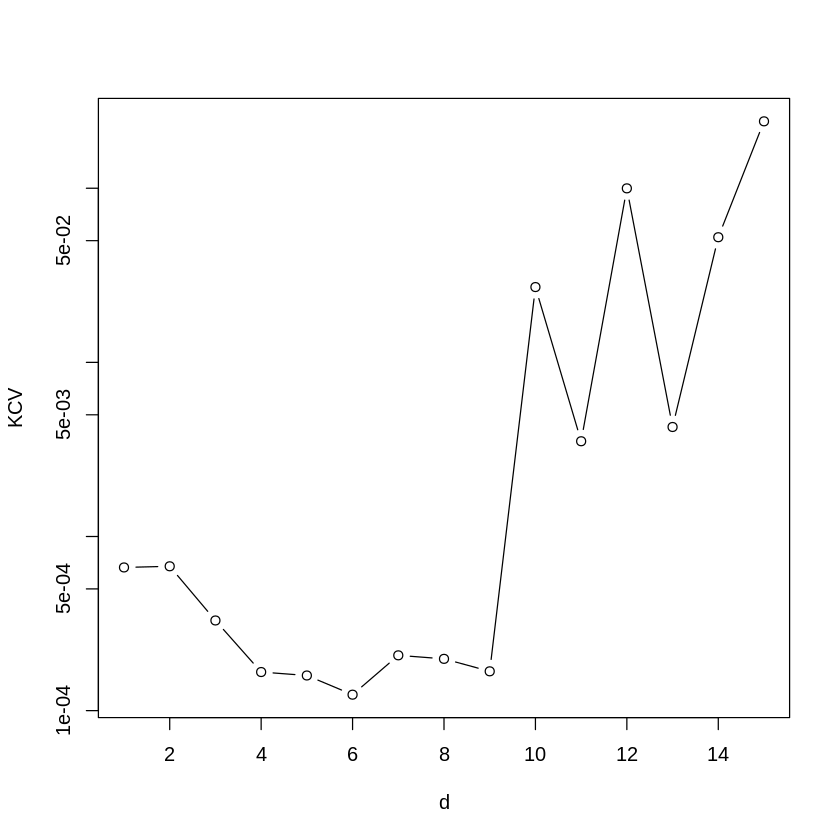

In [ ]:
library(boot)
ds <- 1:15
ps <- ds+1
set.seed(123)
KCV <- sapply(ds, function(d)
        cv.glm(train, glm(y ~ poly(x, degree = d),
        train, family = gaussian), K = K )$delta[1] )
plot(ds, KCV, type = "b", log = "y", xlab = "d")

In [ ]:
ds[which.min(KCV)]

[1] 6

In [ ]:
# LOOCV
oneout <- vector()
# loop
for (i in 1:n){
fit_i  <- lm( y ~ poly(x, degree = d), data = train[-i, ])
yhat_i <- predict(fit_i, newdata = data.frame(x = train$x[i]) )
oneout[i] <- ( train$y[i] -  yhat_i )^2
}
# LOOCV estimate
mean(oneout)

[1] 0.0003439458

In [ ]:
fit <-  lm(y ~ poly(x, d), train)
# design matrix
X <- model.matrix(fit)
# hat matrix
H <- X %*% solve(t(X) %*% X) %*% t(X)
# LOOCV estimate
mean(
   ( (train$y - predict(fit)) / (1 - diag(H))  )^2
)

[1] 0.0003439458

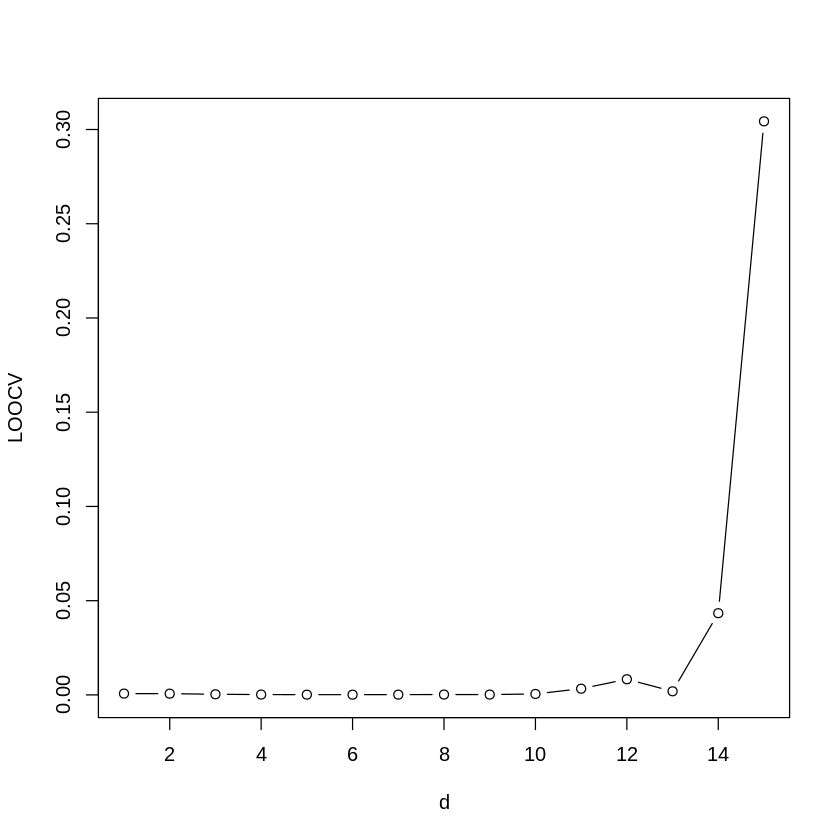

In [ ]:
LOOCV <- sapply(ds, function(d)
       cv.glm(train, glm(y ~ poly(x, degree = d),
       train, family = gaussian) )$delta[1] )
plot(ds, LOOCV, type = "b", xlab = "d")

In [ ]:
ds[which.min(LOOCV)]

[1] 6

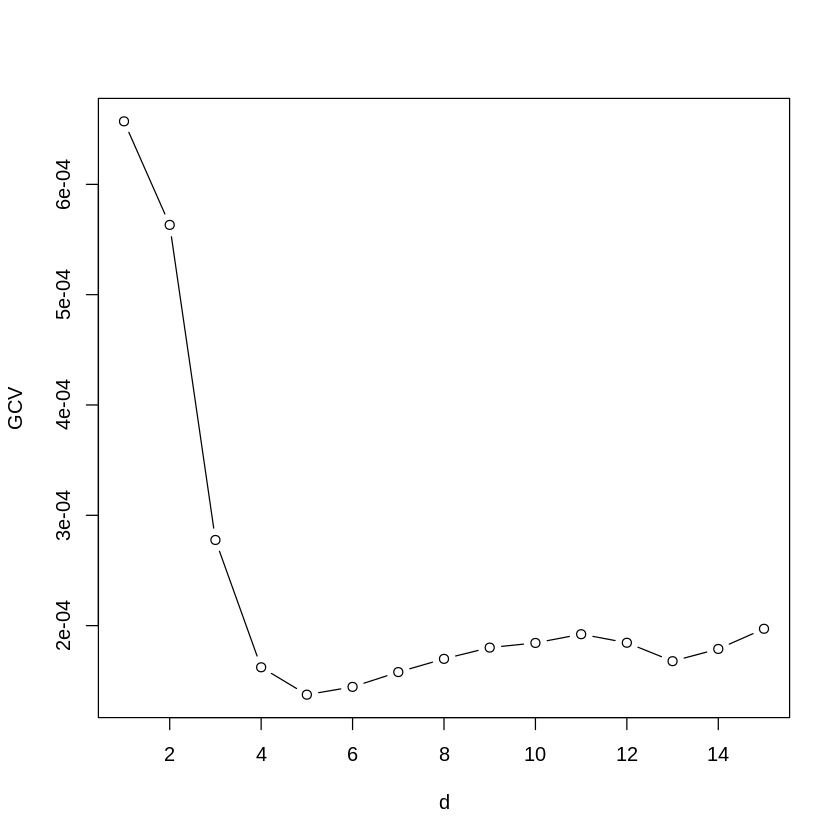

In [ ]:
fun <- function(d) if (d == 0) lm(y ~ 1, train) else lm(y ~ poly(x, degree = d), train)
fits <- lapply(ds, fun)
MSEs.tr <- unlist( lapply(fits, deviance) )/n
GCV <- MSEs.tr/(1 - (ps)/n )^2
plot(ds, GCV, type = "b", xlab = "d")

In [ ]:
ds[which.min(GCV)]

[1] 5